<a id=top></a>

# AM10 - Spring 2020 

## Lecture 10 - NEW

## Exploratory Data Analysis of the COVID-19 Pandemic

## The Forced SIR model

#### &copy; 2020 Eleni Angelaki Kaxiras, Efthimios Kaxiras

<BR>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import scipy.stats as st
from scipy.optimize import curve_fit
from scipy.stats import norm

In [3]:
import pandas as pd
import seaborn as sns
import warnings
import glob
# extend pandas printing instead of ...
pd.options.display.max_columns = 500  
pd.options.display.max_rows = 3000     
pd.options.display.max_colwidth = 200
pd.options.display.precision = 3

#from sklearn.metrics import confusion_matrix, classification_report
#warnings.filterwarnings('ignore')


In [4]:
def plot_country(country, data):
    plt.figure(figsize=(15,5))
    x = np.arange(len(data))
    plt.title(country)
    plt.plot(x, data);

### Import Daily Data from:
https://ourworldindata.org/coronavirus-source-data 
(Sourced from the European Centre for Disease)

In [5]:
data = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
daily_coronadata = pd.read_csv(data, index_col=False)
daily_coronadata

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,10/04/2020,10,4,2020,61,1,Afghanistan,AF,AFG,3.717e+07
1,09/04/2020,9,4,2020,56,3,Afghanistan,AF,AFG,3.717e+07
2,08/04/2020,8,4,2020,30,4,Afghanistan,AF,AFG,3.717e+07
3,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,3.717e+07
4,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,3.717e+07
...,...,...,...,...,...,...,...,...,...,...
9917,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,1.444e+07
9918,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,1.444e+07
9919,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,1.444e+07
9920,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,1.444e+07


In [7]:
#
# Find the 3-letter acronym for each country
#
country = 'Greece'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].countryterritoryCode.iloc[0]

'GRC'

In [8]:
country = 'United_States_of_America'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].countryterritoryCode.iloc[0]

'USA'

In [15]:
#
#  Display all the data for a country
#
country = 'United_States_of_America'
daily_coronadata[daily_coronadata['countriesAndTerritories']==country].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9580,10/04/2020,10,4,2020,33901,1873,United_States_of_America,US,USA,3.272e+08
9581,09/04/2020,9,4,2020,33323,1922,United_States_of_America,US,USA,3.272e+08
9582,08/04/2020,8,4,2020,30613,1906,United_States_of_America,US,USA,3.272e+08
9583,07/04/2020,7,4,2020,30561,1342,United_States_of_America,US,USA,3.272e+08
9584,06/04/2020,6,4,2020,25398,1146,United_States_of_America,US,USA,3.272e+08


In [20]:
#
#  Find the population of a country
#
country = 'United_States_of_America'
popul_USA=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
print(' Population %12i' %popul_USA)

 Population    327167434


In [57]:
country = 'China'
popul_CHN=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_CHN = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_CHN = daily_all_CHN[17:]
daily_CHN
#len(daily_CHN)

array([    4,    17,   136,    19,   151,   140,    97,   259,   441,
         665,   787,  1753,  1466,  1740,  1980,  2095,  2590,  2812,
        3237,  3872,  3727,  3160,  3418,  2607,  2974,  2490,  2028,
       15141,  4156,  2538,  2007,  2052,  1890,  1750,   394,   891,
         826,   647,   218,   515,   410,   439,   329,   428,   574,
         205,   127,   119,   117,   170,   101,    46,    45,    20,
          29,    24,    22,    19,    22,    25,    43,    23,    44,
          99,    52,    65,   138,    69,    78,   102,    94,   119,
         113,    98,    84,    54,   100,    70,    62,    48,    67,
          56,    86,    86])

In [10]:
country = 'Italy'
popul_ITA=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_ITA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_ITA=daily_all_ITA[53:]
daily_ITA
#len(daily_ITA)

array([  14,   62,   53,   97,   93,   78,  250,  238,  240,  561,  347,
        466,  587,  769,  778, 1247, 1492, 1797,  977, 2313, 2651, 2547,
       3497, 2823, 4000, 3526, 4207, 5322, 5986, 6557, 5560, 4789, 5249,
       5210, 6153, 5959, 5974, 5217, 4050, 4053, 4782, 4668, 4585, 4805,
       4316, 3599, 3039, 3836])

In [11]:
country = 'Spain'
popul_ESP=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_ESP = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_ESP=daily_all_ESP[56:]
daily_ESP
#len(daily_ESP)

array([   1,    4,    5,   13,    9,   32,   17,   31,   37,   49,   61,
        113,   56,  159,  615,  435,  501,  864, 1227, 1522, 2000, 1438,
       1987, 2538, 3431, 2833, 4946, 3646, 4517, 6584, 7937, 8578, 7871,
       8189, 6549, 6398, 9222, 7719, 8102, 7472, 7026, 6023, 4273, 5478,
       6180])

In [12]:
country = 'France'
popul_FRA=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_FRA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_FRA=daily_all_FRA[57:]
daily_FRA
#len(daily_FRA)

array([   2,    3,   21,   19,   43,   30,   48,   34,   73,  138,  190,
        103,  410,  286,  372,  497,  595,  785,  838,  924, 1210, 1097,
       1404, 1861, 1617, 1847, 1559, 3838, 2446, 2931, 3922, 3809, 4611,
       2599, 4376, 7578, 4861, 2116, 5233, 4267, 1873, 3912, 3777, 3881])

In [13]:
country = 'Netherlands'
popul_NLD=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_NLD = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_NLD=daily_all_NLD[59:]
daily_NLD
#len(daily_NLD)

array([   1,    1,    5,    6,    5,   10,   10,   44,   46,   60,   77,
         56,   61,  121,  111,  190,  155,  176,  278,  292,  346,  409,
        534,  637,  573,  545,  811,  852, 1019, 1172, 1159, 1104,  884,
        845, 1019, 1083, 1026,  904, 1224,  952,  777,  969])

In [14]:
country = 'Greece'
popul_GRC=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_GRC = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_GRC=daily_all_GRC[58:]
daily_GRC
#len(daily_GRC)

array([  1,   2,   1,   3,   0,   3,  22,  13,  21,   7,  11,   6,   9,
        34,  57,  38, 103,  21,  35,  31,  46,  31,  35,  94,  71,  48,
        78,  71,  74,  95,  95,  56, 102,  61, 139,  99,  60,  62,  20,
        77,  52])

In [15]:
country = 'Germany'
popul_DEU=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_DEU = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_DEU=daily_all_DEU[57:]
daily_DEU
#len(daily_DEU)

array([   2,    4,   26,   10,   54,   18,   28,   39,   66,  138,  284,
        163,   55,  237,  157,  271,  802,  693,  733, 1043, 1174, 1144,
       1042, 5940, 4049, 3276, 3311, 4438, 2342, 4954, 5780, 6294, 3965,
       4751, 4615, 5453, 6156, 6174, 6082, 5936, 3677, 3834, 4003, 4974])

In [16]:
country = 'United_States_of_America'
popul_USA=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_USA = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_USA=daily_all_USA[59:]
daily_USA
#len(daily_USA)

array([    1,     6,     3,    20,    14,    22,    34,    74,   105,
          95,   121,   200,   271,   287,   351,   511,   777,   823,
         887,  1766,  2988,  4835,  5374,  7123,  8459, 11236,  8789,
       13963, 16797, 18695, 19979, 18360, 21595, 24998, 27103, 28819,
       32425, 34272, 25398, 30561, 30613, 33323])

In [17]:
country = 'United_Kingdom'
popul_GBR=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_GBR = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_GBR=daily_all_GBR[59:]
daily_GBR
#len(daily_GBR)

array([   3,    2,    5,   13,    4,   11,   34,   30,   48,   43,   67,
         48,   52,   83,  134,  117,  433,  251,  152,  407,  680,  647,
        706, 1035,  665,  967, 1427, 1452, 2129, 2885, 2546, 2433, 2619,
       3009, 4324, 4244, 4450, 3735, 5903, 3802, 3634, 5491])

In [18]:
country = 'Sweden'
popul_SWE=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_SWE = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_SWE=daily_all_SWE[58:]
daily_SWE
#len(daily_SWE)

array([  1,   5,   5,   1,   1,   1,   9,  11,  26,  76,  24,  42,  45,
        78, 136, 158, 155, 149, 108,  89,  46, 134, 122, 200, 123, 160,
       110, 256, 238, 296, 240, 401, 253, 328, 407, 512, 519, 612, 365,
       387, 376, 487, 726])

In [19]:
country = 'Switzerland'
popul_CHE=daily_coronadata[daily_coronadata['countriesAndTerritories']==country].popData2018.iloc[0]
daily_all_CHE = daily_coronadata[daily_coronadata['countriesAndTerritories']==country]['cases'].to_numpy()[::-1]
daily_CHE=daily_all_CHE[57:]
daily_CHE
#len(daily_CHE)

array([   1,    0,    7,    4,    6,    6,    6,    7,   20,   30,  122,
         55,   68,   42,  116,  152,  212,  267,  238,  841,    0,  450,
        360,  878,  952, 1237,  894, 1044,  774,  925, 1000, 1390, 1048,
       1122, 1138,  696,  962, 1124, 1033,  974,  821,  552,  590,  546])

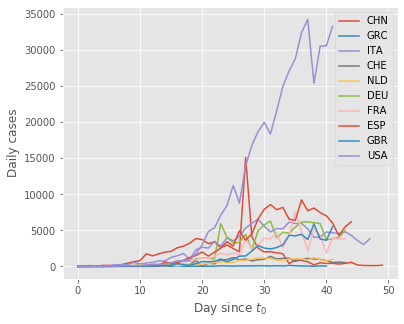

In [20]:
#country, data = country_data('Greece', coronadata, 0)

fig=plt.figure(figsize=(6,5))
plt.plot(daily_CHN,label='CHN')
plt.plot(daily_GRC,label='GRC')
plt.plot(daily_ITA,label='ITA')
plt.plot(daily_CHE,label='CHE')
plt.plot(daily_NLD,label='NLD')
plt.plot(daily_DEU,label='DEU')
plt.plot(daily_FRA,label='FRA')
plt.plot(daily_ESP,label='ESP')
plt.plot(daily_GBR,label='GBR')
plt.plot(daily_USA,label='USA')

#plt.plot(daily_SWE,label='SWE')
plt.xlabel('Day since $t_0$')
plt.ylabel('Daily cases')

plt.legend()
fig.savefig('Total_10.png',format='png')

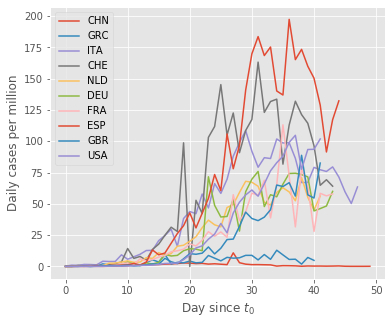

In [21]:
#country, data = country_data('Greece', coronadata, 0)
fig=plt.figure(figsize=(6,5))
plt.plot(daily_CHN/popul_CHN*1.0e6,label='CHN')
plt.plot(daily_GRC/popul_GRC*1.0e6,label='GRC')
plt.plot(daily_ITA/popul_ITA*1.0e6,label='ITA')
plt.plot(daily_CHE/popul_CHE*1.0e6,label='CHE')
plt.plot(daily_NLD/popul_NLD*1.0e6,label='NLD')
plt.plot(daily_DEU/popul_DEU*1.0e6,label='DEU')
plt.plot(daily_FRA/popul_FRA*1.0e6,label='FRA')
plt.plot(daily_ESP/popul_ESP*1.0e6,label='ESP')
plt.plot(daily_GBR/popul_GBR*1.0e6,label='GBR')
plt.plot(daily_USA/popul_USA*1.0e6,label='USA')

#plt.plot(daily_SWE/popul_SWE*1.0e6,label='SWE')

plt.xlabel('Day since $t_0$')
plt.ylabel('Daily cases per million')


plt.legend()
fig.savefig('Total_scale_10.png',format='png')

In [23]:
def daily_fit(t,t1,dt,dn):
    a=0.25
    t2=t1+dt
    return dn*(1./(1.+np.exp(-a*(t-t1))) - 1./(1.+np.exp(-a*(t-t2))))

In [24]:
def beta(alfa,t1,dt,t):
    t2=t1+dt
    b1=(1+np.exp(-alfa*(t-t2)))
    b2=np.exp(-alfa*(t-t2))-np.exp(-alfa*(t-t1))
    beta=alfa*b1/b2
    return beta

In [25]:
def gamma(alfa,t1,dt,t):
    t2=t1+dt
    c1=1+np.exp(-alfa*dt)+np.exp(alfa*(t-t2))+np.exp(-alfa*(t-t2+dt))
    c2=4*(1-np.exp(-alfa*dt))*np.cosh(alfa*(t-t2)/2)**2
    gamma=alfa*c1/c2
    return gamma

[   27.24035456    16.10286703 10539.90416677]
6.417046273237774


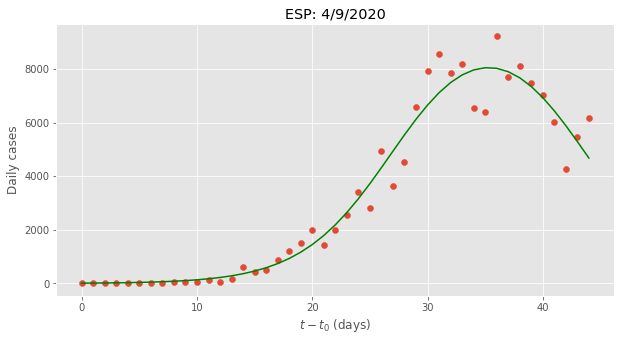

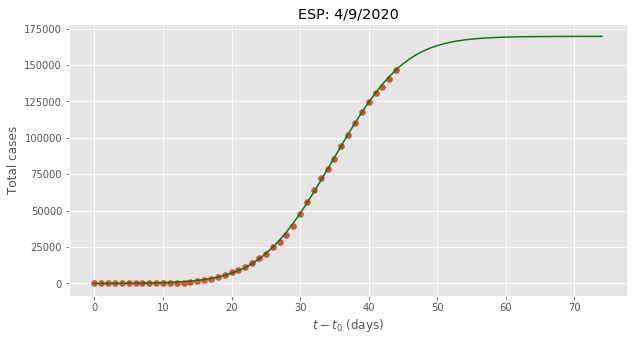

169665.40709969486 11


In [54]:
# ESP data and parapmeters
popul=popul_ESP
fdat = daily_ESP
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

#a1= 0.25    
#a2= 0.25  
#t1= 25      
#dt= 13     
#dn= 13000

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

cumm_dat=np.zeros(len(fdat))
cumm_fit=np.zeros(len(fdat))
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
    cumm_fit[i]=cumm_fit[i-1]+ffit[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('ESP: 4/9/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_ESP.png',format='png')

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('ESP: 4/9/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Total_ESP.png',format='png')

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_ESP=t1
dt_ESP=dt
Nt_ESP=Nt

alfa=0.25
xdat_ESP=xdat
beta_ESP=beta(alfa,t1,dt,xdat)
gamma_ESP=1.0/gamma(alfa,t1,dt,xdat)


[  21.28883065   25.79653971 5969.65017197]
8.14905400498398


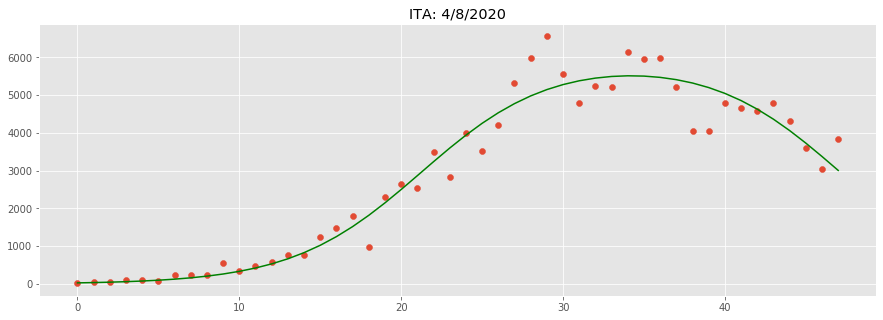

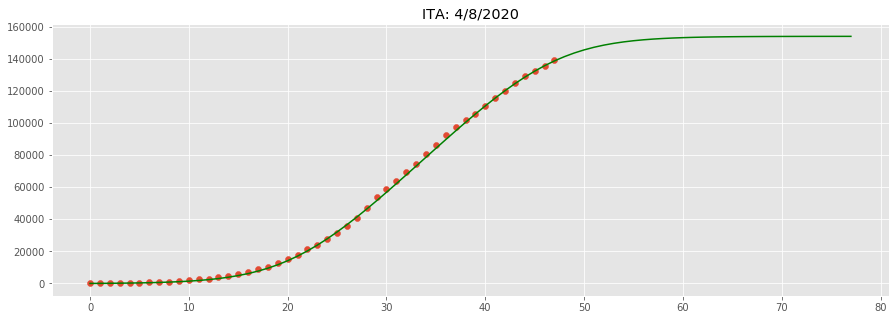

153882.23578511598 10


In [30]:
# ITA data and parapmeters

fdat = daily_ITA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

#a1= 0.25    
#a2= 0.25    
#t1= 20      
#dt= 25      
#dn= 6000    

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('ITA: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('ITA: 4/8/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_ITA=t1
dt_ITA=dt
Nt_ITA=cumm_fit[-1]

alfa=0.25
xdat_ITA=xdat
beta_ITA=beta(alfa,t1,dt,xdat)
gamma_ITA=1.0/gamma(alfa,t1,dt,xdat)
#plt.plot(xdat,betat)
#plt.plot(xdat,gammat)
#plt.show()

[  23.23876662   21.71242835 1211.63211202]
7.1532016985881945


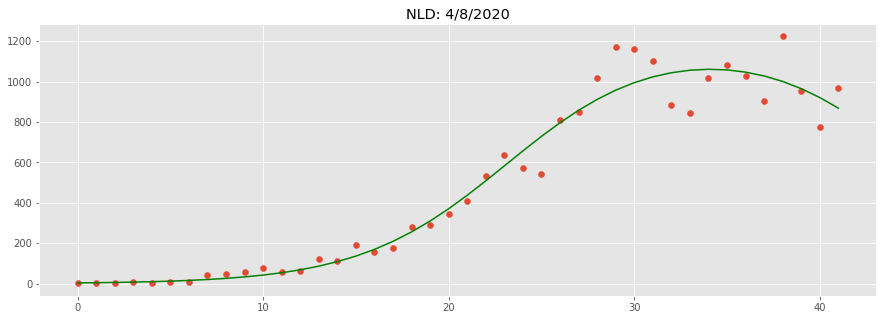

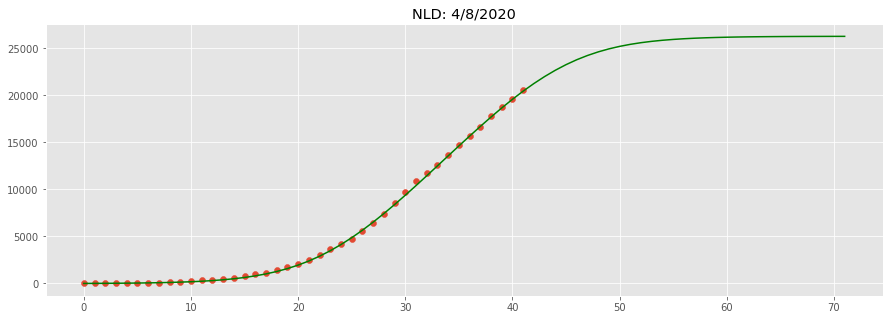

26288.453742261805 14


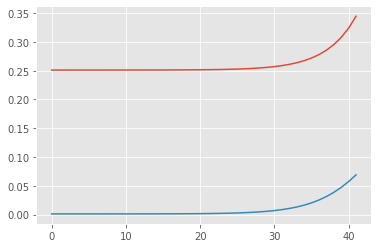

In [31]:
# NDL data and parapmeters

fdat = daily_NLD
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2] 

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('NLD: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('NLD: 4/8/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_NLD=t1
dt_NLD=dt
Nt_NLD=Nt

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[  24.16340978   21.6975792  6225.52543328]
13.289610800418036


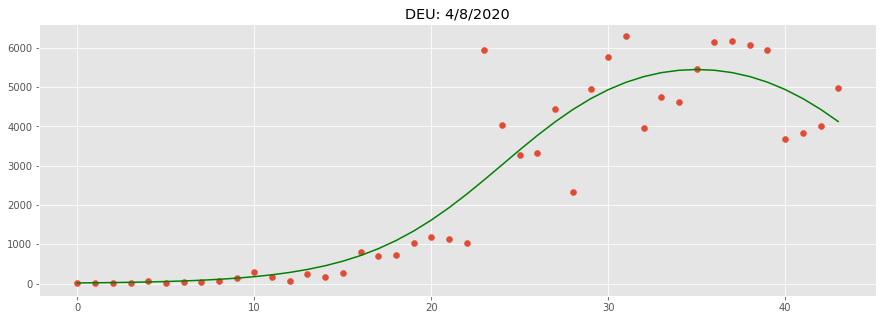

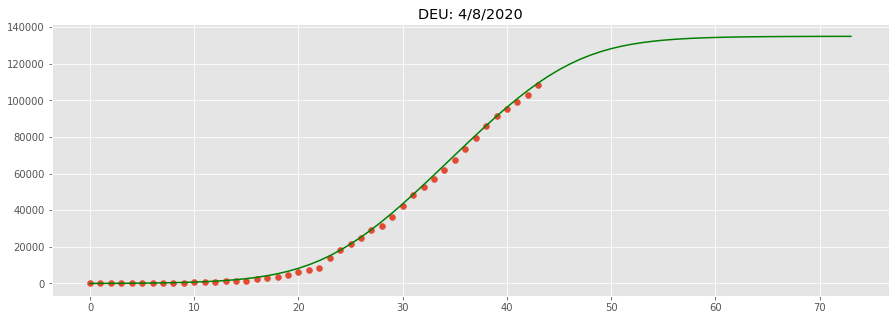

135002.29232567403 13


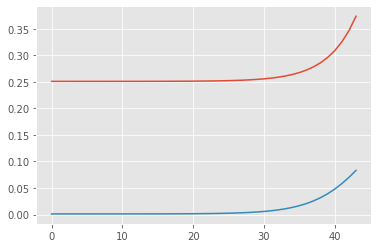

In [32]:
# DEU data and parapmeters

fdat = daily_DEU
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('DEU: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('DEU: 4/8/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_DEU=t1
dt_DEU=dt
Nt_DEU=Nt

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[  26.53111077   18.22645701 5401.2100863 ]
14.697169424713572


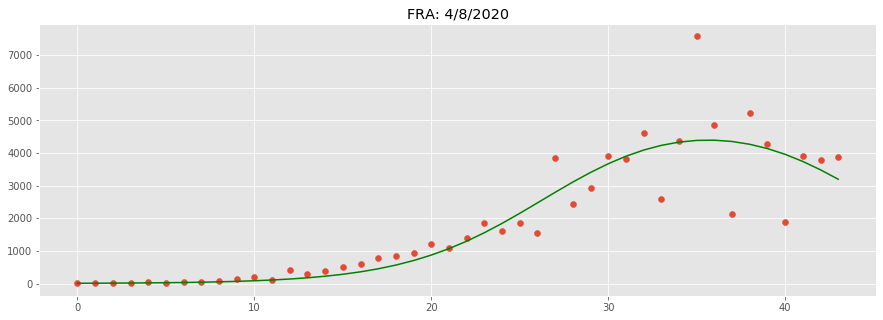

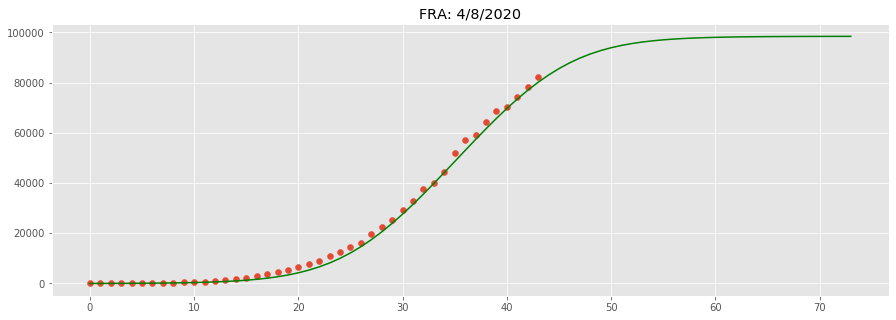

98404.02156029762 13


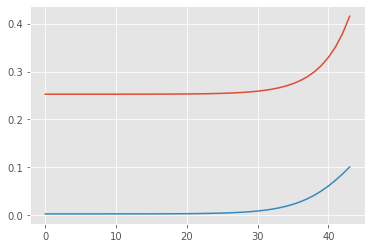

In [33]:
# FRA data and parapmeters

fdat = daily_FRA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)

t1=popt[0]
dt=popt[1]
dn=popt[2]

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('FRA: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('FRA: 4/8/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_FRA=t1
dt_FRA=dt
Nt_FRA=Nt

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[17.15781908 25.43510001 85.95073359]
25.436343411974576


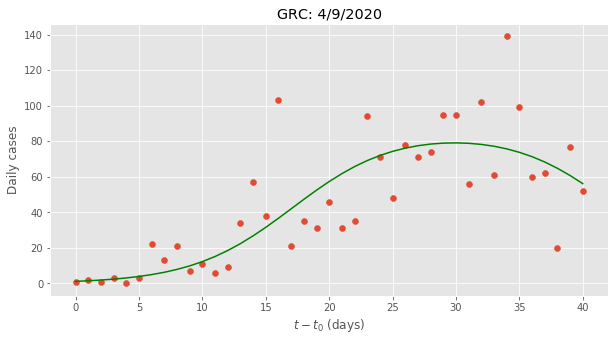

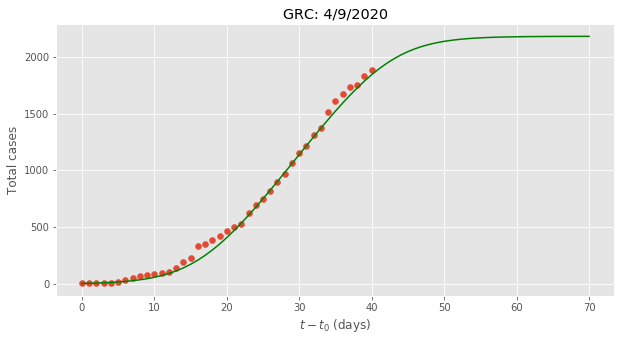

2181.7284697637792 12


In [55]:
# GRC data and parapmeters

fdat = daily_GRC
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('GRC: 4/9/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_GRC.png',format='png')


T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('GRC: 4/9/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Total_GRC.png',format='png')

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_GRC=t1
dt_GRC=dt
Nt_GRC=Nt

alfa=0.25
xdat_GRC=xdat
beta_GRC=beta(alfa,t1,dt,xdat)
gamma_GRC=1.0/gamma(alfa,t1,dt,xdat)
#plt.plot(xdat,betat)
#plt.plot(xdat,gammat)
#plt.show()

[  18.51300256   11.07143134 7343.97341089]
17.912292170886868


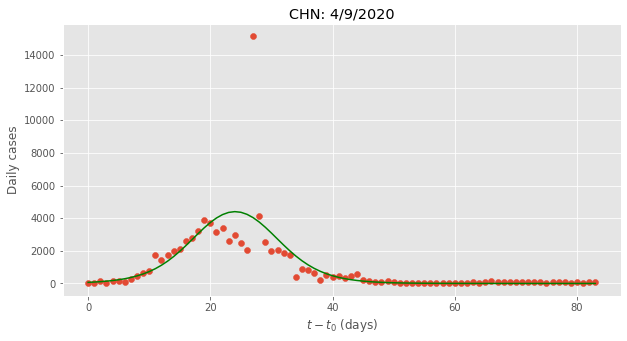

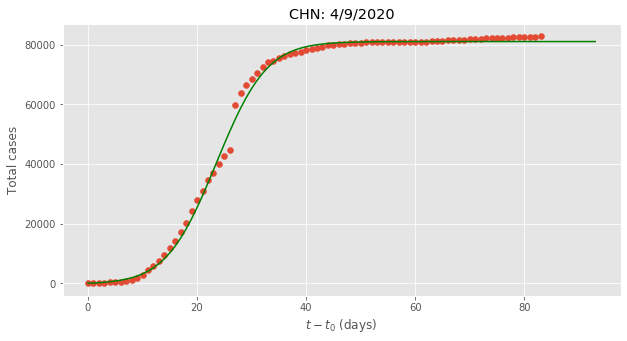

81072.5635341799 -40


In [58]:
# CHN data and parapmeters

fdat = daily_CHN
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('CHN: 4/9/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_CHN.png',format='png')


T_ext=10
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('CHN: 4/9/2020')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
#plt.legend()
plt.show();
fig.savefig('Total_CHN.png',format='png')

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_CHN=t1
dt_CHN=dt
Nt_CHN=Nt

alfa=0.25
xdat_CHN=xdat
beta_CHN=beta(alfa,t1,dt,xdat)
gamma_CHN=1.0/gamma(alfa,t1,dt,xdat)
#plt.plot(xdat,betat)
#plt.plot(xdat,gammat)
#plt.show()

[2.87135649e+01 4.59461743e+03 3.37497925e+04]
4.612178365076412


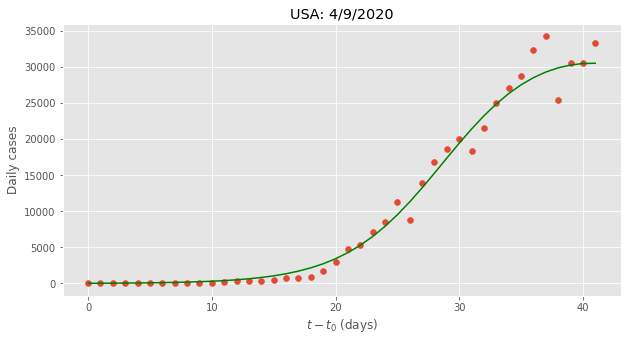

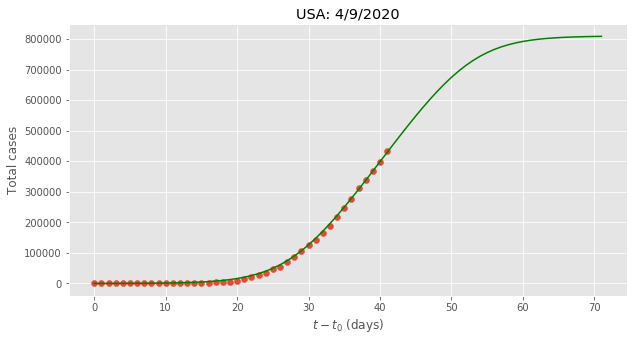

808684.375768576 21


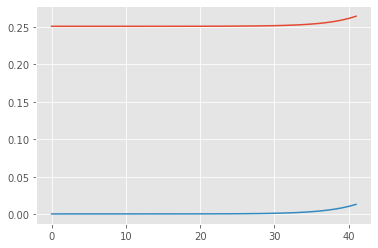

In [73]:
# USA data and parapmeters

fdat = daily_USA
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

dt=24

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('USA: 4/9/2020')
plt.ylabel('Daily cases')
plt.xlabel('$t-t_0$ (days)')
plt.show();
fig.savefig('Daily_USA.png',format='png')


T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
    
fig=plt.figure(figsize=(10,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.ylabel('Total cases')
plt.xlabel('$t-t_0$ (days)')
plt.title('USA: 4/9/2020')
plt.show();
fig.savefig('Total_USA.png',format='png')

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_USA=t1
dt_USA=dt
Nt_USA=Nt

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[  29.85438007 7416.44254714 5054.20981681]
8.014956803017908


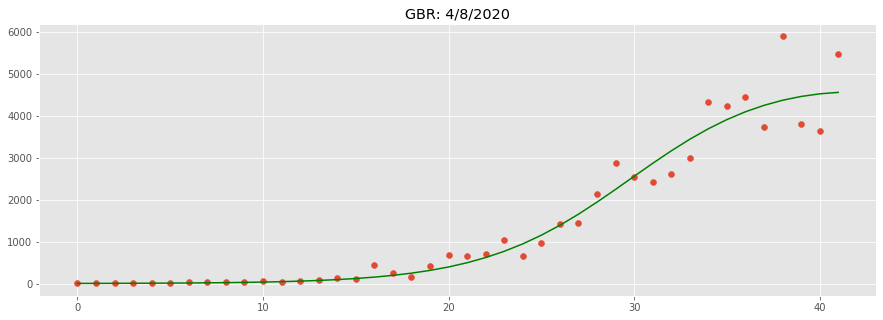

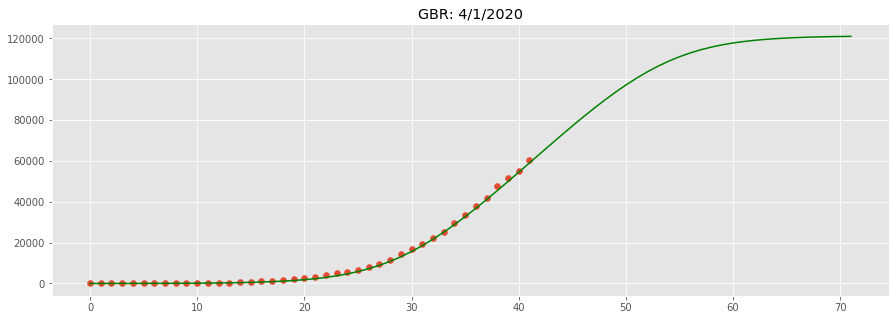

121048.16900821906 22


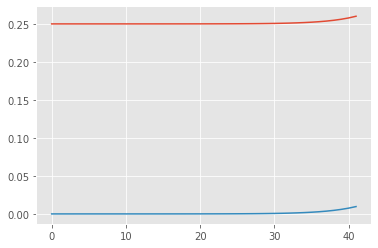

In [81]:
# CHN data and parapmeters

def daily_fit(t,t1,dt,dn):
    a=0.25
    t2=t1+dt
    return dn*(1./(1.+np.exp(-a*(t-t1))) - 1./(1.+np.exp(-a*(t-t2))))

fdat = daily_GBR
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

dt = 24

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('GBR: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('GBR: 4/1/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_GBR=t1
dt_GBR=dt
Nt_GBR=Nt

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[ 27.8846197  836.54121594 514.44132983]
14.860658742927102


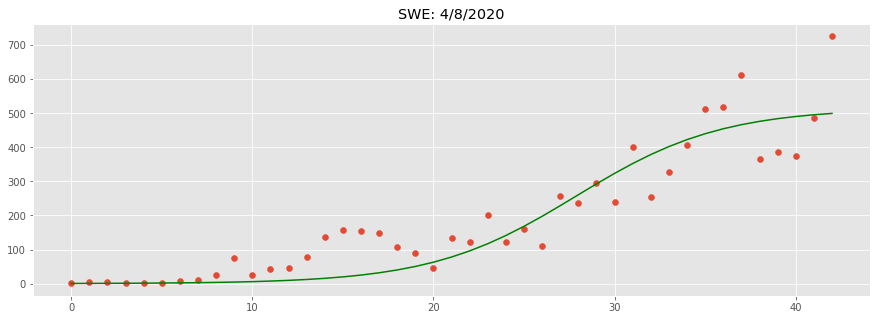

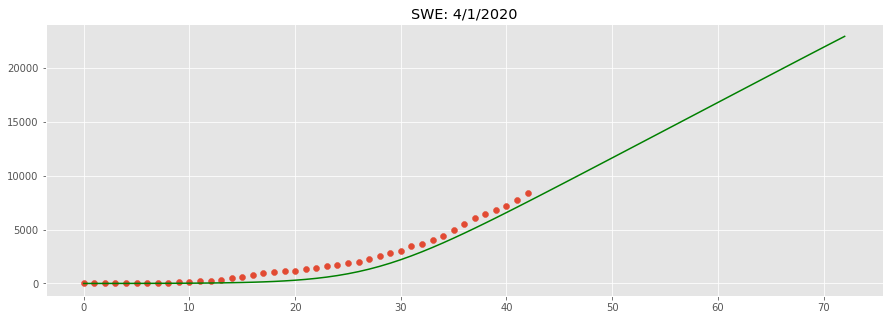

22906.940759462024


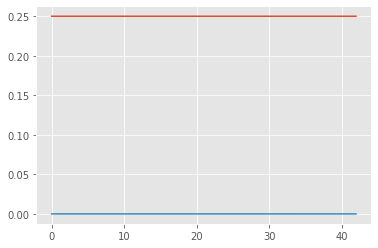

In [82]:
# CHN data and parapmeters

fdat = daily_SWE
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

dt = 60

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('SWE: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('SWE: 4/1/2020')
plt.show();

print(cumm_fit[-1])

alfa=0.25
betat=beta(alfa,t1,dt,xdat)
gammat=gamma(alfa,t1,dt,xdat)
plt.plot(xdat,betat)
plt.plot(xdat,gammat)
plt.show()

[  22.42296681   19.13810114 1330.46125503]
11.976739568912851


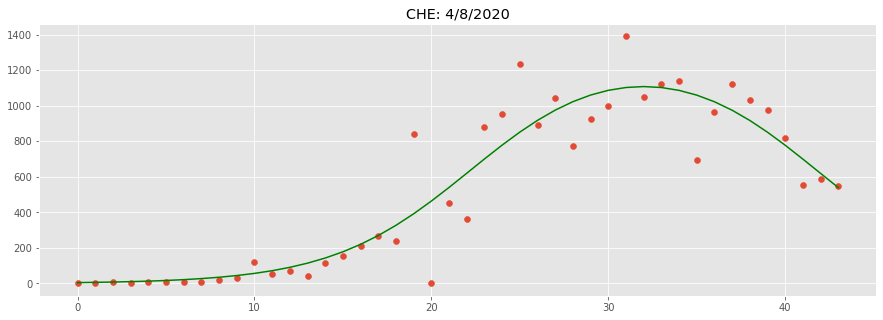

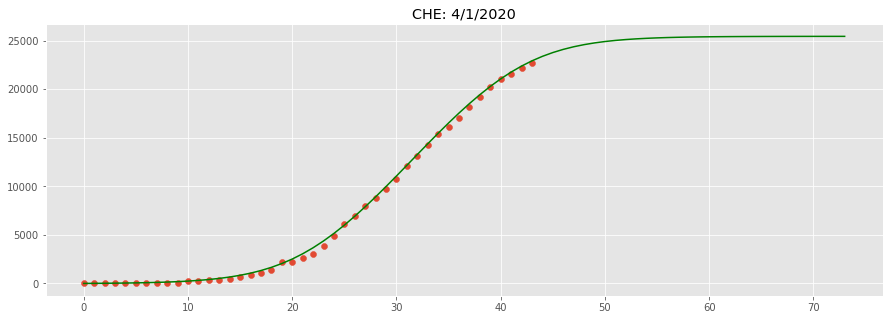

25443.658308652655 10


In [44]:
# CHN data and parapmeters

fdat = daily_CHE
xdat = np.arange(len(fdat))
    
popt, pcov = curve_fit(daily_fit, xdat, fdat)
print(popt)
t1=popt[0]
dt=popt[1]
dn=popt[2]

#dt=23

ffit=daily_fit(xdat, t1, dt, dn)

rmsfit=np.sqrt(np.sum((ffit-fdat)**2)/len(fdat))
print(rmsfit/dn*100)

plt.figure(figsize=(15,5))
plt.scatter(xdat,fdat)
plt.plot(xdat,ffit,'g')
plt.title('CHE: 4/8/2020')
plt.show();

T_ext=30
cumm_dat=np.zeros(len(fdat))
xdat_ext = np.arange(len(fdat)+T_ext)
ffit_ext=daily_fit(xdat_ext, t1, dt, dn)
cumm_fit=np.zeros(len(fdat)+T_ext)
cumm_dat[0]=fdat[0]
cumm_fit[0]=ffit[0]
for i in range (1,len(fdat)):
    cumm_dat[i]=cumm_dat[i-1]+fdat[i]
for i in range (1,len(fdat)+T_ext):
    cumm_fit[i]=cumm_fit[i-1]+ffit_ext[i]
plt.figure(figsize=(15,5))
plt.scatter(xdat,cumm_dat)
plt.plot(xdat_ext,cumm_fit,'g')
plt.title('CHE: 4/1/2020')
plt.show();

Nt=cumm_fit[-1]
Ncut=0.99*Nt
for i in range (len(xdat_ext)):
    if cumm_fit[i] > Ncut:
        imax=i
        break
        
print(Nt,imax-len(xdat))

t1_CHE=t1
dt_CHE=dt
Nt_CHE=Nt

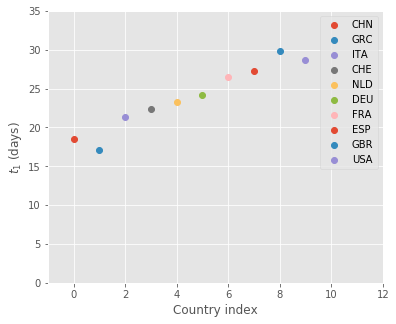

In [79]:
t1_ten=np.zeros(10)
x=np.arange(10)
t1_ten[7]=t1_ESP
t1_ten[2]=t1_ITA
t1_ten[4]=t1_NLD
t1_ten[5]=t1_DEU
t1_ten[6]=t1_FRA
t1_ten[1]=t1_GRC
t1_ten[0]=t1_CHN
t1_ten[9]=t1_USA
t1_ten[8]=t1_GBR
t1_ten[3]=t1_CHE

fig=plt.figure(figsize=(6,5))
plt.plot(x[0],t1_ten[0],'o',label='CHN')
plt.plot(x[1],t1_ten[1],'o',label='GRC')
plt.plot(x[2],t1_ten[2],'o',label='ITA')
plt.plot(x[3],t1_ten[3],'o',label='CHE')
plt.plot(x[4],t1_ten[4],'o',label='NLD')
plt.plot(x[5],t1_ten[5],'o',label='DEU')
plt.plot(x[6],t1_ten[6],'o',label='FRA')
plt.plot(x[7],t1_ten[7],'o',label='ESP')
plt.plot(x[8],t1_ten[8],'o',label='GBR')
plt.plot(x[9],t1_ten[9],'o',label='USA')
plt.xlabel('Country index')
plt.ylabel('$t_1$ (days)')
plt.ylim(0,35)
plt.xlim(-1,12)
plt.legend()
plt.show()
fig.savefig('t1_10.png',format='png')


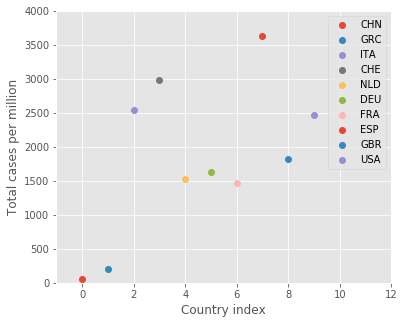

In [83]:
Nt_ten=np.zeros(10)
x=np.arange(10)
Nt_ten[0]=Nt_CHN
Nt_ten[1]=Nt_GRC
Nt_ten[2]=Nt_ITA
Nt_ten[3]=Nt_CHE
Nt_ten[4]=Nt_NLD
Nt_ten[5]=Nt_DEU
Nt_ten[6]=Nt_FRA
Nt_ten[7]=Nt_ESP
Nt_ten[8]=Nt_GBR
Nt_ten[9]=Nt_USA

fig=plt.figure(figsize=(6,5))
plt.plot(x[0],Nt_ten[0]/popul_CHN*1.0e6,'o',label='CHN')
plt.plot(x[1],Nt_ten[1]/popul_GRC*1.0e6,'o',label='GRC')
plt.plot(x[2],Nt_ten[2]/popul_ITA*1.0e6,'o',label='ITA')
plt.plot(x[3],Nt_ten[3]/popul_CHE*1.0e6,'o',label='CHE')
plt.plot(x[4],Nt_ten[4]/popul_NLD*1.0e6,'o',label='NLD')
plt.plot(x[5],Nt_ten[5]/popul_DEU*1.0e6,'o',label='DEU')
plt.plot(x[6],Nt_ten[6]/popul_FRA*1.0e6,'o',label='FRA')
plt.plot(x[7],Nt_ten[7]/popul_ESP*1.0e6,'o',label='ESP')
plt.plot(x[8],Nt_ten[8]/popul_GBR*1.0e6,'o',label='GBR')
plt.plot(x[9],Nt_ten[9]/popul_USA*1.0e6,'o',label='USA')
plt.ylim(0,4000)
plt.xlim(-1,12)
plt.xlabel('Country index')
plt.ylabel('Total cases per million')
plt.legend()
plt.show()
fig.savefig('Nt_10.png',format='png')

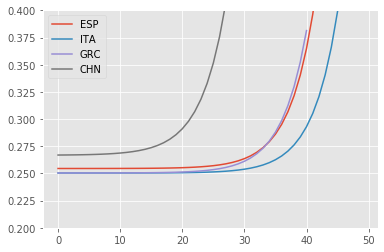

In [48]:
plt.plot(xdat_ESP,beta_ESP,label='ESP')
plt.plot(xdat_ITA,beta_ITA,label='ITA')
plt.plot(xdat_GRC,beta_GRC,label='GRC')
plt.plot(xdat_CHN,beta_CHN,label='CHN')
plt.ylim(0.2,0.4)
plt.legend()
plt.show;

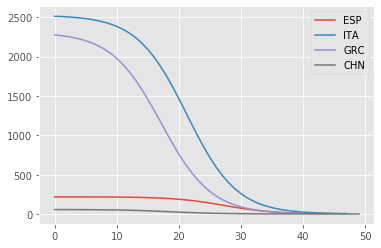

In [49]:
plt.plot(xdat_ESP,gamma_ESP,label='ESP')
plt.plot(xdat_ITA,gamma_ITA,label='ITA')
plt.plot(xdat_GRC,gamma_GRC,label='GRC')
plt.plot(xdat_CHN,gamma_CHN,label='CHN')
plt.legend()
plt.show;